In [1]:
import pandas as pd
import numpy as np
import types
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sb
data = pd.read_csv(r'C:\\Users\\ibiza\\OneDrive\\Desktop\\Data\\1.csv')


In [2]:
data.head()

,job_id,host_oar,cigri_oar,submission_time_oar,start_time_oar,stop_time_oar,processor,job_type_oar,job_user_oar,resource_ids_oar,...,number_of_RAPL_observation,max_amp_spec,dom_perdiod,dom_freq,energy_mean,energy_var,energy_coef_var,auto_correlation,significance_level,total_energy_consumption
0,3858710,38,0,1561436840,1561436841,1561523248,1,PASSIVE,irnakat,"17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32",...,849,20.367383,36.0,-1,5.372342,0.397716,0.074030,0.512321,0.067266,4.561118e+11
1,3858710,38,0,1561436840,1561436841,1561523248,2,PASSIVE,irnakat,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16",...,849,6.942142,36.0,-1,5.941807,0.317332,0.053407,0.336247,0.067266,5.044594e+11
2,3858710,44,0,1561436840,1561436841,1561523248,1,PASSIVE,irnakat,"17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32",...,849,2.132627,36.0,-1,5.660922,0.252701,0.044640,0.092261,0.067266,4.806123e+11
3,3858710,44,0,1561436840,1561436841,1561523248,2,PASSIVE,irnakat,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16",...,849,2.054555,36.0,-1,5.886325,0.271917,0.046195,0.152256,0.067266,4.997490e+11
4,3858710,46,0,1561436840,1561436841,1561523248,1,PASSIVE,irnakat,"17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32",...,849,2.570486,36.0,-1,5.917699,0.257829,0.043569,0.098378,0.067266,5.024126e+11


Ce jeu de données contient de nombreuses colonnes inutiles. En suivant les conseils de Salah, on les enlèves pour ne conserver que les colonnes apportant de l'information exploitable.

In [3]:
data_2 = data.drop(columns=['psetmin','psetmax','number_of_RAPL_observation', 'max_amp_spec',
       'dom_perdiod', 'dom_freq', 'energy_mean', 'energy_var',
       'energy_coef_var', 'auto_correlation', 'significance_level'])
data_2

,job_id,host_oar,cigri_oar,submission_time_oar,start_time_oar,stop_time_oar,processor,job_type_oar,job_user_oar,resource_ids_oar,nb_resources,runtime_oar,total_energy_consumption
0,3858710,38,0,1561436840,1561436841,1561523248,1,PASSIVE,irnakat,"17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32",16,86407,4.561118e+11
1,3858710,38,0,1561436840,1561436841,1561523248,2,PASSIVE,irnakat,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16",16,86407,5.044594e+11
2,3858710,44,0,1561436840,1561436841,1561523248,1,PASSIVE,irnakat,"17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32",16,86407,4.806123e+11
3,3858710,44,0,1561436840,1561436841,1561523248,2,PASSIVE,irnakat,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16",16,86407,4.997490e+11
4,3858710,46,0,1561436840,1561436841,1561523248,1,PASSIVE,irnakat,"17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32",16,86407,5.024126e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,3875040,58,0,1562689973,1562689986,1562754186,2,PASSIVE,gorbunova,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16",16,64200,6.538056e+11
793,3875042,59,0,1562690863,1562690864,1562696520,1,PASSIVE,hansmsc90,"17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32",16,5656,5.857977e+10
794,3875042,59,0,1562690863,1562690864,1562696520,2,PASSIVE,hansmsc90,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16",16,5656,5.857947e+10
795,3875044,61,0,1562691227,1562691229,1562696924,1,PASSIVE,hansmsc90,"17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32",16,5695,5.910405e+10


Les variables sont les suivantes 
    - Job_id = Numéro identifiant le job à la quelle appartient la tâche
    - hoast_oar = Numéro identifiant la machine sur laquelle la tâche a été exécutée
    - cigri_oar = Numéro identifiant le type de tâche 
    - Submission_time_oar = Indique le moment auquel la tâche a été soumise (UNIX TIME)
    - Start_time_oar = Indique le moment auquel la tâche a commencé à être executée (UNIX TIME)
    - Stop_time_oar = Indique le moment auquel la tâche a complétée (UNIX TIME)
    - Processor = Numéro identifiant le processeur d'une machine ayant executée la tâche
    - Job_type_oar = Indique le typede tâche
    -Job_user_oar = Indique l'utilisateur ayant soumis la tâche
    - Resource_ids_oar = Indique les coeurs du processeur ayant executé la tâche
    - Nb_ressources = Indique le nombre de coeurs ayant executé la tâche
    - Runtime = Indique la durée (en s) de la tâche
    - Total_energy_consumption = Indique la consommation énergétique de la tâche
    

In [4]:
data_2["temps_attente_lancement"] = data_2["start_time_oar"] - data_2["submission_time_oar"]
data_2.head()

,job_id,host_oar,cigri_oar,submission_time_oar,start_time_oar,stop_time_oar,processor,job_type_oar,job_user_oar,resource_ids_oar,nb_resources,runtime_oar,total_energy_consumption,temps_attente_lancement
0,3858710,38,0,1561436840,1561436841,1561523248,1,PASSIVE,irnakat,"17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32",16,86407,4.561118e+11,1
1,3858710,38,0,1561436840,1561436841,1561523248,2,PASSIVE,irnakat,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16",16,86407,5.044594e+11,1
2,3858710,44,0,1561436840,1561436841,1561523248,1,PASSIVE,irnakat,"17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32",16,86407,4.806123e+11,1
3,3858710,44,0,1561436840,1561436841,1561523248,2,PASSIVE,irnakat,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16",16,86407,4.997490e+11,1
4,3858710,46,0,1561436840,1561436841,1561523248,1,PASSIVE,irnakat,"17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32",16,86407,5.024126e+11,1


A l'instar du Runtime, on crée une variable composite indiquant le temps d'attente (en s) avant que tâche soumise soit executée. L'analyse de cette dernière pourrait se révéler intéressante dans l'optique d'une optimisation de l'allocation des jobs.

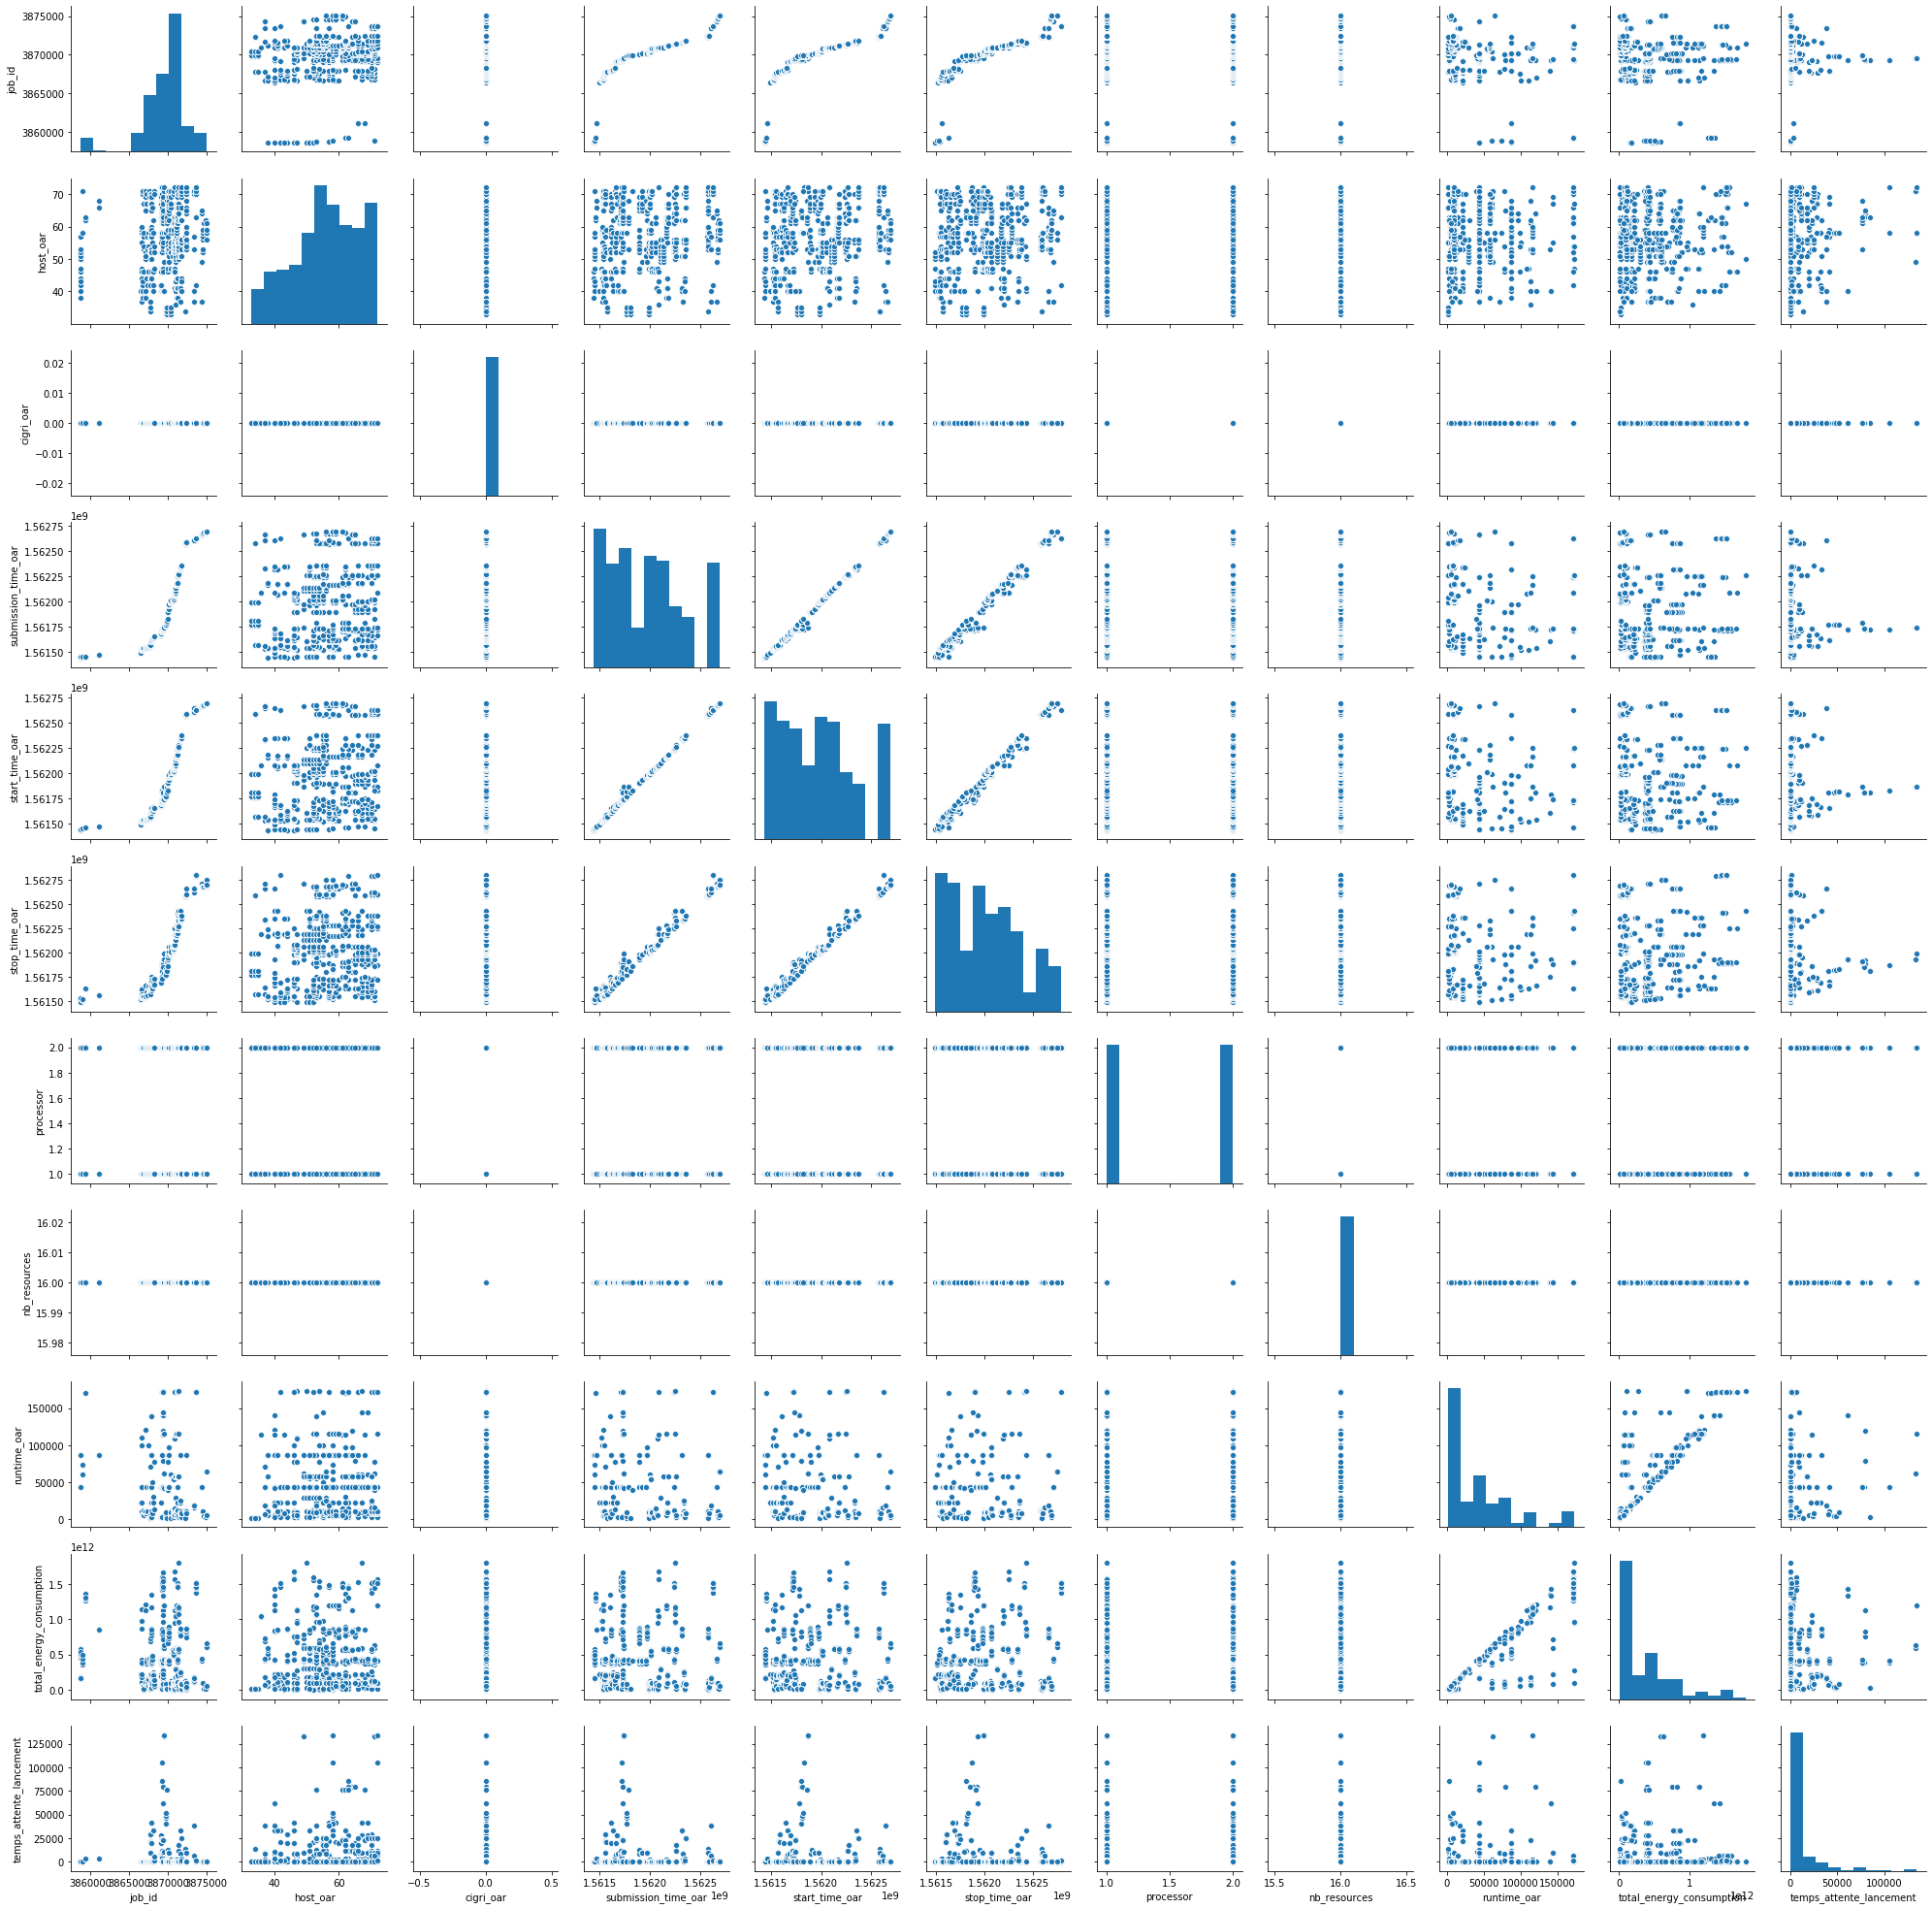

In [5]:
print(sb.pairplot(data_2,))

Dans le cadre d'une analyse préliminaire, on réalise une matrice de nuage de points identifier les éventuelles corrélations entre variables. On remarque que les variables "total_energy_consumption" et "runtime_oar" semblent avoir une relation linéaire. Les autres variables ne semblent pas avoir de réel impact sur l'évolution de la consommation. Pour corroborer cette hypothèse, on calcule les correlations inter-variables.

In [6]:
print(data_2.corr()["total_energy_consumption"])

job_id                     -0.017372
host_oar                    0.120141
cigri_oar                        NaN
submission_time_oar        -0.000437
start_time_oar              0.005708
stop_time_oar               0.119529
processor                   0.020665
nb_resources                     NaN
runtime_oar                 0.889437
total_energy_consumption    1.000000
temps_attente_lancement     0.104175
Name: total_energy_consumption, dtype: float64


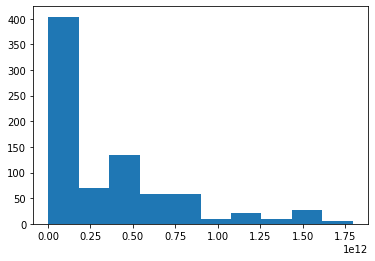

In [7]:
hist = plt.hist(data_2["total_energy_consumption"])

Afin de préparer la classification et la prédiction de la consommation d'énergie on définit des catégories. Pour cela on observe la distribution de la variable. On remarque ainsi que 50,6% des tâches ont une consommation inférieure à 2,86e+09.Par conséquent, nous allons redécouper cet intervalle en pour notre classification.

In [8]:
def fonction_decoupage(x) :
    if x <= hist[1][0]/2 :
        return "Catégorie 0"
    elif x <= hist[1][1]: 
        return "Catégorie 1"
    elif x <= hist[1][2]: 
        return "Catégorie 2"
    elif x <= hist[1][3]: 
        return "Catégorie 3"
    elif x <= hist[1][4]: 
        return "Catégorie 4"
    elif x <= hist[1][5]: 
        return "Catégorie 5"
    elif x <= hist[1][6]: 
        return "Catégorie 6"
    elif x <= hist[1][7]: 
        return "Catégorie 8"
    elif x <= hist[1][8]: 
        return "Catégorie 9"
    elif x <= hist[1][9]: 
        return "Catégorie 10"
    else : 
        return "Catégorie 11"
data_2["Catégorie_consommation"] = data_2["total_energy_consumption"].apply(fonction_decoupage)
data_2.head()

,job_id,host_oar,cigri_oar,submission_time_oar,start_time_oar,stop_time_oar,processor,job_type_oar,job_user_oar,resource_ids_oar,nb_resources,runtime_oar,total_energy_consumption,temps_attente_lancement,Catégorie_consommation
0,3858710,38,0,1561436840,1561436841,1561523248,1,PASSIVE,irnakat,"17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32",16,86407,4.561118e+11,1,Catégorie 3
1,3858710,38,0,1561436840,1561436841,1561523248,2,PASSIVE,irnakat,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16",16,86407,5.044594e+11,1,Catégorie 3
2,3858710,44,0,1561436840,1561436841,1561523248,1,PASSIVE,irnakat,"17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32",16,86407,4.806123e+11,1,Catégorie 3
3,3858710,44,0,1561436840,1561436841,1561523248,2,PASSIVE,irnakat,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16",16,86407,4.997490e+11,1,Catégorie 3
4,3858710,46,0,1561436840,1561436841,1561523248,1,PASSIVE,irnakat,"17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32",16,86407,5.024126e+11,1,Catégorie 3


In [9]:
all_inputs = data_2[['host_oar','runtime_oar','processor']].values
all_classes = data_2['Catégorie_consommation'].values
for i in range(5) :
    print(all_inputs[i], '-->',all_classes[i])

[   38 86407     1] --> Catégorie 3
[   38 86407     2] --> Catégorie 3
[   44 86407     1] --> Catégorie 3
[   44 86407     2] --> Catégorie 3
[   46 86407     1] --> Catégorie 3


On prépare la prédiction en séléctionnant les variables prédictives et la variable à prédire.

In [10]:
from sklearn.model_selection import train_test_split
(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_classes, test_size = 0.25, 
                                     random_state=1)

On sépare en entrainement/test

(array([  6.,   9.,  51.,  86., 194., 209., 302., 101.,  40.,   2.]),
 array([0.865 , 0.8775, 0.89  , 0.9025, 0.915 , 0.9275, 0.94  , 0.9525,
        0.965 , 0.9775, 0.99  ]),
 <a list of 10 Patch objects>)

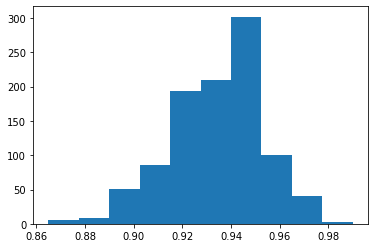

In [11]:
from sklearn.tree import DecisionTreeClassifier
model_accuracies = []

for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_classes, test_size=0.25)
    
    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)
    
plt.hist(model_accuracies) 

La prédition semble être plutôt correcte.

C:\Users\ibiza\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 6 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Text(0.5, 1.0, 'Average score: 0.8583074655606244')

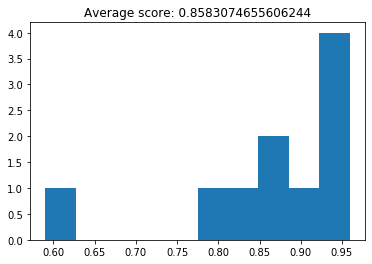

In [12]:
from sklearn.model_selection import cross_val_score

decision_tree_classifier = DecisionTreeClassifier()

cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_classes, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores))) 

La cross-validation permet de confirmer la justesse. Cependant, il n'y a pas assez d'individus dans certaines catégories, peutêtre faudrait-il plus dedonnées.

In [13]:
data_3 = data_2.groupby("job_user_oar")
data_3.size().sort_values(ascending=False)

job_user_oar
irnakat         300
liyub           116
hewg             70
glesur           52
arnaudpladys     48
levan            46
gorbunova        44
cfalvo           42
liy              20
hansmsc90        20
baladimf          6
amartinez         6
bremond           4
bonamy            4
veyralou2         2
lalandmi          2
leonard           2
mayagueguen       2
monsimau          2
brossier          2
ssimoussi         2
thurinj           2
zhuh              2
mariondonat       1
dtype: int64

Il peut être intéressant de regarder les statistiques par utilisateur. 

In [14]:
data_3["total_energy_consumption"].mean().sort_values(ascending=False)

job_user_oar
bremond         1.794763e+12
glesur          1.105954e+12
mayagueguen     9.563349e+11
gorbunova       7.873274e+11
cfalvo          6.059499e+11
hewg            4.087002e+11
amartinez       3.535640e+11
irnakat         3.344702e+11
baladimf        3.180993e+11
mariondonat     2.437247e+11
veyralou2       1.885430e+11
levan           1.539019e+11
bonamy          1.399489e+11
hansmsc90       1.242668e+11
arnaudpladys    9.295561e+10
liyub           6.709292e+10
zhuh            1.826710e+10
thurinj         1.776382e+10
lalandmi        1.549867e+10
brossier        1.482746e+10
liy             1.212770e+10
ssimoussi       1.007688e+10
leonard         7.893740e+09
monsimau        4.373683e+09
Name: total_energy_consumption, dtype: float64

On remarque ainsi que l'utilisateur 'glesur' soumet un nombre important de tâches, lesquelles consomment également une quantité importante d'énergie. A contrario, l'utilisateur' liyub' semble soumettre beaucoup de tâches peu consommatrices. Cette information pourrait potentiellement être utilisée pour affiner la prédiction de la consommation. 